# First Contact

In this notebook, we aim to analyze how successful teams are at first contact throw-in passes. 

In [1]:
# import libraries
from statsbombpy import sb
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np

In [2]:
# obtain list of matches for specific competition and season 
df_matches = sb.matches(competition_id=55, season_id=43)
df_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3788753,2021-06-16,15:00:00.000,Europe - UEFA Euro,2020,Finland,Russia,0,1,available,...,2021-09-22T16:39:05.697512,2,Group Stage,Saint-Petersburg Stadium,Danny Desmond Makkelie,Markku Kanerva,Stanislav Cherchesov,1.1.0,2,2
1,3788765,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Turkey,3,1,available,...,2021-11-11T13:54:37.507376,3,Group Stage,Bakı Olimpiya Stadionu,Slavko Vinčić,Vladimir Petković,Şenol Güneş,1.1.0,2,2
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,...,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena,Slavko Vinčić,Roberto Martínez Montoliú,Roberto Mancini,1.1.0,2,2
3,3795221,2021-07-07,21:00:00.000,Europe - UEFA Euro,2020,England,Denmark,2,1,available,...,2021-09-22T22:33:37.494366,6,Semi-finals,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Kasper Hjulmand,1.1.0,2,2
4,3795506,2021-07-11,21:00:00.000,Europe - UEFA Euro,2020,Italy,England,1,1,available,...,2021-09-22T22:40:31.690550,7,Final,Wembley Stadium,Björn Kuipers,Roberto Mancini,Gareth Southgate,1.1.0,2,2
5,3794688,2021-06-29,18:00:00.000,Europe - UEFA Euro,2020,England,Germany,2,0,available,...,2021-09-22T23:46:25.457149,4,Round of 16,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Joachim Löw,1.1.0,2,2
6,3794692,2021-06-29,21:00:00.000,Europe - UEFA Euro,2020,Sweden,Ukraine,1,2,available,...,2021-09-22T23:38:19.483199,4,Round of 16,Hampden Park,Daniele Orsato,Jan Olof Andersson,Andrii Shevchenko,1.1.0,2,2
7,3794686,2021-06-28,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Spain,3,5,available,...,2021-09-22T23:30:10.428563,4,Round of 16,Parken,Cüneyt Çakιr,Zlatko Dalić,Luis Enrique Martínez García,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,...,2021-09-22T16:40:48.020474,4,Round of 16,Estadio de La Cartuja,Felix Brych,Roberto Martínez Montoliú,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3794685,2021-06-26,21:00:00.000,Europe - UEFA Euro,2020,Italy,Austria,2,1,available,...,2021-09-22T16:40:41.310001,4,Round of 16,Wembley Stadium,Anthony Taylor,Roberto Mancini,Franco Foda,1.1.0,2,2


In [3]:
# obtain event info for specific match
df_events = sb.events(match_id = 3788741)
df_events

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Turkey,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Italy,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:04:29.312,Injury Stoppage,NaN
3799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:04:31.909,Injury Stoppage,NaN
3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:38:59.616,Injury Stoppage,NaN
3801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:07:12.643,Own Goal Against,NaN


In [4]:
# obtain information about columns and value types for event data
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ball_receipt_outcome            137 non-null    object 
 1   ball_recovery_offensive         1 non-null      object 
 2   ball_recovery_recovery_failure  6 non-null      object 
 3   block_deflection                1 non-null      object 
 4   carry_end_location              862 non-null    object 
 5   clearance_aerial_won            14 non-null     object 
 6   clearance_body_part             39 non-null     object 
 7   clearance_head                  25 non-null     object 
 8   clearance_left_foot             8 non-null      object 
 9   clearance_right_foot            6 non-null      object 
 10  counterpress                    127 non-null    object 
 11  dribble_nutmeg                  1 non-null      object 
 12  dribble_outcome                 32

### Cleaning and Filtering Data

In [6]:
# obtaining the csv file with the event data from all matches
# creating a dataframe with this data
df_allData = pd.read_csv('full_data_sorted.csv')
df_allData

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_75719/3959350156.py:3: DtypeWarning: Columns (2,4,12,26,35,43,49,69,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df_allData = pd.read_csv('/Users/rachelyang/Documents/GitHub/StatsBomb/full_data_sorted.csv')


,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192690,4814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192691,4715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192692,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192693,4983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_throwIn = df_allData.loc[df_allData['play_pattern'] == 'From Throw In']
df_throwIn

,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2088,NaN,NaN,NaN,NaN,"[3.3, 12.7]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192565,2803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192566,4023,NaN,NaN,NaN,NaN,"[70.4, 28.6]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192567,4633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192585,1419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# count number of throw-ins across all matches
throw_count = 0
for pass_type in df_throwIn["pass_type"]:
    current_matchID=df_throwIn
    if pass_type == "Throw-in":
        throw_count+=1
print(throw_count)

1948


There are 1948 throw-ins across all matches! 

In [9]:
# count number of throw-ins per match

# match id and number of throw ins in the match
throw_count = {}

for row in df_throwIn.index:
    if df_throwIn["pass_type"][row]=="Throw-in":
        if df_throwIn["match_id"][row] in throw_count:
            throw_count[df_throwIn["match_id"][row]]+=1
        else:
            throw_count[df_throwIn["match_id"][row]]=1
print(throw_count)

{3788741: 45, 3788742: 37, 3788754: 26, 3794690: 42, 3794686: 39, 3788758: 44, 3788774: 48, 3788762: 42, 3795107: 33, 3788763: 35, 3788775: 39, 3788759: 22, 3794687: 26, 3794691: 45, 3788755: 33, 3788743: 48, 3788748: 56, 3788772: 39, 3788764: 27, 3795506: 64, 3788744: 28, 3788752: 35, 3788768: 28, 3788769: 41, 3788753: 37, 3788745: 35, 3788765: 26, 3788773: 25, 3788749: 39, 3788766: 33, 3788770: 29, 3788750: 33, 3788746: 31, 3788747: 57, 3788751: 31, 3788771: 35, 3788767: 49, 3795109: 32, 3795220: 49, 3788756: 34, 3794688: 31, 3788760: 42, 3788776: 48, 3795187: 31, 3794692: 46, 3794685: 61, 3788761: 30, 3794689: 40, 3788757: 34, 3795221: 46, 3795108: 42}


Here, we can see how many throw-ins there are per match. The average amount of throw-ins per match is 38 throw ins! 

In [10]:
# obtaining number of throw ins, pass location, pass length, pass height, pass angle, outcome

# throw-in number and its corresponding location, length, height, angle, and outcome
pass_info = {}
throw_count=0
for row in df_throwIn.index:
    if df_throwIn["pass_type"][row] == "Throw-in":
        throw_count +=1
        temp_list = [json.loads(df_throwIn["location"][row]), df_throwIn["pass_length"][row], df_throwIn["pass_height"][row], df_throwIn["pass_angle"][row]]
        if df_throwIn["pass_outcome"][row] == "Incomplete":
            temp_list.append("Incomplete")
        else:
            temp_list.append("Complete")
        pass_info[throw_count] = temp_list
print(pass_info)

{1: [[43.1, 0.1], 28.285154, 'Low Pass', 2.876891, 'Complete'], 2: [[91.1, 0.1], 8.823832, 'Low Pass', 0.8978253, 'Complete'], 3: [[83.0, 0.1], 12.841339, 'Low Pass', 1.2293439, 'Complete'], 4: [[64.3, 80.0], 25.89614, 'Low Pass', -2.664129, 'Complete'], 5: [[30.0, 0.1], 27.627884, 'Low Pass', 2.2381885, 'Complete'], 6: [[22.8, 0.1], 20.61286, 'High Pass', 0.37239844, 'Incomplete'], 7: [[76.0, 0.1], 8.700575, 'Low Pass', 0.91580147, 'Complete'], 8: [[67.9, 0.1], 19.61734, 'Low Pass', 2.7326849, 'Complete'], 9: [[57.0, 80.0], 8.021222, 'Low Pass', -0.62604654, 'Complete'], 10: [[26.2, 80.0], 18.816216, 'Low Pass', -1.8841437, 'Complete'], 11: [[33.3, 80.0], 10.962208, 'Low Pass', -0.6234308, 'Complete'], 12: [[47.4, 80.0], 11.321661, 'Low Pass', -0.8228806, 'Complete'], 13: [[72.4, 80.0], 17.325415, 'Low Pass', -2.7632298, 'Complete'], 14: [[99.8, 0.1], 16.686821, 'High Pass', 1.0293491, 'Complete'], 15: [[91.9, 0.1], 15.052574, 'Low Pass', 1.2532474, 'Complete'], 16: [[55.4, 0.1], 9.52

This dicationary shows us detailed information of each throw-in including the location, length, height, angle, and outcome. 

In [11]:
# get location of each throw-in

pass_list = []
for row in df_throwIn.index:
    # print(new_df["location"][row])
    # if (not new_df["pass_type"][row] == "nan"):
    if not pd.isna(df_throwIn["pass_type"][row]):
    # and new_df["pass_type"][row] == "Throw-in":
        pass_list.append([df_throwIn["pass_type"][row], json.loads(df_throwIn["location"][row])])
        # throwin_location = new_df["location"][row]
print(pass_list)

[['Throw-in', [43.1, 0.1]], ['Throw-in', [91.1, 0.1]], ['Throw-in', [83.0, 0.1]], ['Throw-in', [64.3, 80.0]], ['Throw-in', [30.0, 0.1]], ['Throw-in', [22.8, 0.1]], ['Recovery', [78.1, 72.5]], ['Throw-in', [76.0, 0.1]], ['Throw-in', [67.9, 0.1]], ['Interception', [27.5, 45.8]], ['Recovery', [68.4, 27.8]], ['Throw-in', [57.0, 80.0]], ['Throw-in', [26.2, 80.0]], ['Throw-in', [33.3, 80.0]], ['Throw-in', [47.4, 80.0]], ['Throw-in', [72.4, 80.0]], ['Throw-in', [99.8, 0.1]], ['Throw-in', [91.9, 0.1]], ['Interception', [20.1, 65.7]], ['Recovery', [5.9, 57.1]], ['Throw-in', [55.4, 0.1]], ['Throw-in', [104.5, 80.0]], ['Throw-in', [37.9, 0.1]], ['Interception', [50.6, 32.6]], ['Interception', [68.6, 41.8]], ['Throw-in', [83.0, 80.0]], ['Throw-in', [115.6, 0.1]], ['Throw-in', [11.2, 0.1]], ['Throw-in', [22.2, 0.1]], ['Recovery', [82.7, 77.3]], ['Throw-in', [105.3, 80.0]], ['Recovery', [96.1, 32.1]], ['Throw-in', [104.8, 80.0]], ['Throw-in', [28.8, 80.0]], ['Throw-in', [76.0, 80.0]], ['Throw-in', [

In [12]:
df_match1 = df_events.loc[df_events['play_pattern']=='From Throw In']
# get location of each throw-in

match1 = []
for row in df_match1.index:
    # print(new_df["location"][row])
    # if (not new_df["pass_type"][row] == "nan"):
    if not pd.isna(df_match1["pass_type"][row]):
    # and new_df["pass_type"][row] == "Throw-in":
        match1.append([df_match1["pass_type"][row],df_match1["location"][row]])
        # throwin_location = new_df["location"][row]
print(match1)

[['Throw-in', [43.1, 0.1]], ['Throw-in', [91.1, 0.1]], ['Throw-in', [83.0, 0.1]], ['Throw-in', [64.3, 80.0]], ['Throw-in', [30.0, 0.1]], ['Throw-in', [22.8, 0.1]], ['Recovery', [78.1, 72.5]], ['Throw-in', [76.0, 0.1]], ['Throw-in', [67.9, 0.1]], ['Interception', [27.5, 45.8]], ['Recovery', [68.4, 27.8]], ['Throw-in', [57.0, 80.0]], ['Throw-in', [26.2, 80.0]], ['Throw-in', [33.3, 80.0]], ['Throw-in', [47.4, 80.0]], ['Throw-in', [72.4, 80.0]], ['Throw-in', [99.8, 0.1]], ['Throw-in', [91.9, 0.1]], ['Interception', [20.1, 65.7]], ['Recovery', [5.9, 57.1]], ['Throw-in', [55.4, 0.1]], ['Throw-in', [104.5, 80.0]], ['Throw-in', [37.9, 0.1]], ['Interception', [50.6, 32.6]], ['Interception', [68.6, 41.8]], ['Throw-in', [83.0, 80.0]], ['Throw-in', [115.6, 0.1]], ['Throw-in', [11.2, 0.1]], ['Throw-in', [22.2, 0.1]], ['Recovery', [82.7, 77.3]], ['Throw-in', [105.3, 80.0]], ['Recovery', [96.1, 32.1]], ['Throw-in', [104.8, 80.0]], ['Throw-in', [28.8, 80.0]], ['Throw-in', [76.0, 80.0]], ['Throw-in', [

Text(0.5, 1.0, 'First Contact Throw-ins')

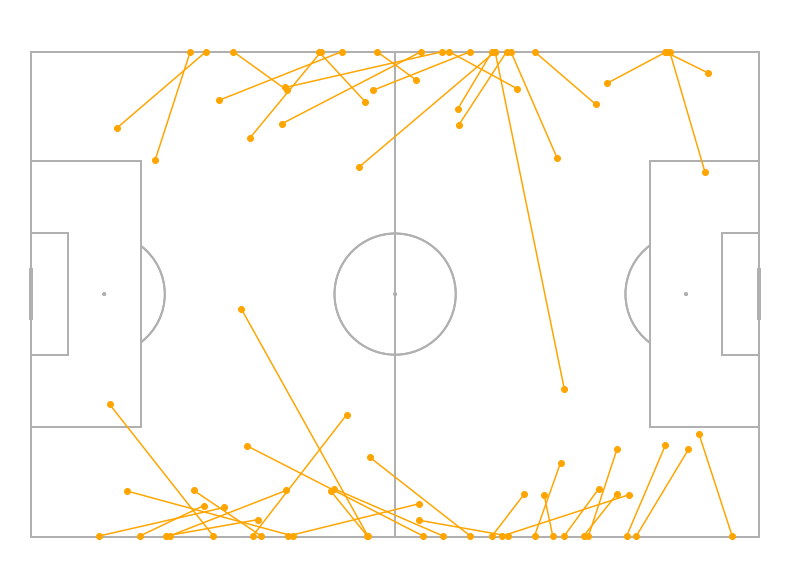

In [13]:
## set up pitch
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12,8))

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
p.draw(ax=ax)
plt.gca().invert_yaxis() 

start_location_list = []
end_location_list = []

for item in match1:
    if item[0] == 'Throw-in':
        start_location_list.append(item[1])

for row in df_match1.index:
    if df_match1["pass_type"][row] == "Throw-in":
        end_location_list.append(df_match1["pass_end_location"][row])

# for loc in start_location_list:
#     p.scatter(loc[0], loc[1], c='orange', s=80, ec='k', ax=ax)
    
# for loc in end_location_list:
#     p.scatter(loc[0], loc[1], c='blue', s=80, ec='k', ax=ax) 

for start_loc, end_loc in zip(start_location_list, end_location_list):
    p.plot((start_loc[0], end_loc[0]), (start_loc[1], end_loc[1]), color='orange', ax=ax)
    p.scatter((start_loc[0], end_loc[0]), (start_loc[1], end_loc[1]), color='orange', ax=ax)
    # p.plot((end_loc[0], end_loc[1]), (start_loc[0], start_loc[1]), color='orange', ax=ax)
    # p.scatter((start_loc[0], start_loc[1]), (end_loc[0], end_loc[1]), color='orange',ax=ax)
    #p.scatter((end_loc[0], end_loc[1]), (start_loc[0], start_loc[1]), color='orange', ax=ax)
plt.title('First Contact Throw-ins',color='white',size=20)
# for row in df_throwIn_final.index:
# # for x in range(len(df_throwIn_final['start_location'])):
#     if df_throwIn_final['pass_type'][row] == "Throw-in":
#         plt.plot(((df_throwIn_final['start_location'][row][0]), (df_throwIn_final['start_location'][row][1])), ((df_throwIn_final['pass_end_location'][row][0]), (df_throwIn_final['pass_end_location'][row][1])), color='orange')
#         plt.scatter(((df_throwIn_final['start_location'][row][0]), (df_throwIn_final['start_location'][row][1])), ((df_throwIn_final['pass_end_location'][row][0]), (df_throwIn_final['pass_end_location'][row][1])), color='orange')

In [14]:
# location of all the incomplete first contact throw ins for one match
match1_nofirstContact = []
for row in df_match1.index:
    if (df_match1["pass_type"][row]=="Throw-in"):
        if (df_match1["pass_outcome"][row]=="Incomplete"):
            match1_nofirstContact.append([df_match1["location"][row], df_match1["pass_end_location"][row]])
print(match1_nofirstContact)


[[[22.8, 0.1], [42.0, 7.6]], [[115.6, 0.1], [110.1, 17.0]], [[11.2, 0.1], [31.8, 4.8]], [[22.2, 0.1], [37.4, 2.8]]]


Text(0.5, 1.0, 'First Contact Unsuccessful Throw-ins')

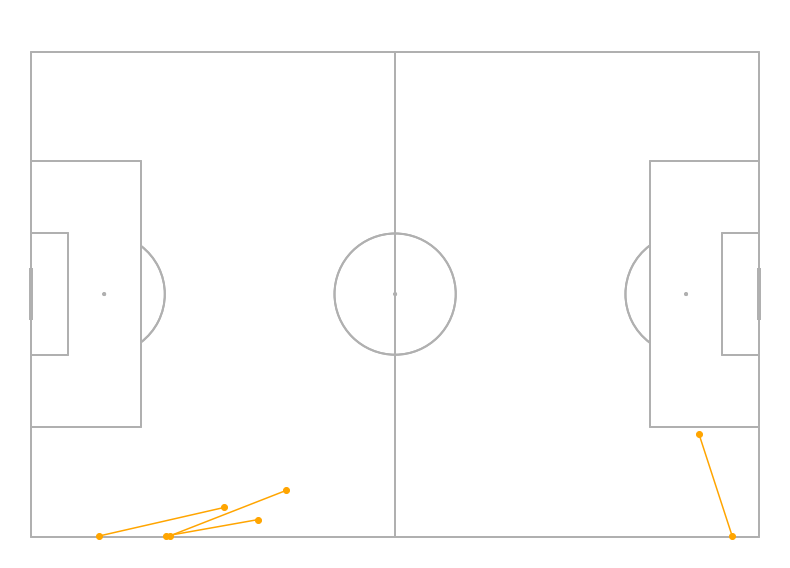

In [21]:
# graphing unsuccessful first contact throw ins

## set up pitch
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12,8))

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
p.draw(ax=ax)
plt.gca().invert_yaxis() 

for loc in match1_nofirstContact:
    p.plot((loc[0][0], loc[1][0]), (loc[0][1], loc[1][1]), color='orange', ax=ax)
    p.scatter((loc[0][0], loc[1][0]), (loc[0][1], loc[1][1]), color='orange', ax=ax)

plt.title('First Contact Unsuccessful Throw-ins',color='white',size=20)

In [16]:
# location of all the incomplete first contact throw ins
no_firstContact = []
for row in df_throwIn.index:
    if (df_throwIn["pass_type"][row]=="Throw-in"):
        if (df_throwIn["pass_outcome"][row]=="Incomplete"):
            no_firstContact.append([json.loads(df_throwIn["location"][row]), json.loads(df_throwIn["pass_end_location"][row])])
print(no_firstContact)


[[[22.8, 0.1], [42.0, 7.6]], [[115.6, 0.1], [110.1, 17.0]], [[11.2, 0.1], [31.8, 4.8]], [[22.2, 0.1], [37.4, 2.8]], [[20.8, 0.1], [44.8, 6.1]], [[59.2, 0.1], [73.3, 15.9]], [[112.2, 0.1], [110.1, 35.3]], [[92.9, 80.0], [103.6, 76.8]], [[99.9, 80.0], [99.2, 70.6]], [[40.4, 0.1], [81.8, 12.2]], [[45.4, 0.1], [79.4, 15.2]], [[38.6, 80.0], [101.3, 66.1]], [[55.4, 80.0], [71.8, 65.5]], [[25.7, 80.0], [42.7, 70.5]], [[21.1, 80.0], [67.5, 62.1]], [[8.5, 0.1], [27.2, 4.4]], [[58.4, 0.1], [75.5, 9.1]], [[81.8, 0.1], [89.5, 15.6]], [[31.8, 80.0], [57.8, 72.9]], [[54.5, 0.1], [72.2, 17.1]], [[22.1, 80.0], [49.1, 71.5]], [[43.3, 80.0], [70.9, 73.7]], [[20.6, 0.1], [50.1, 4.2]], [[26.6, 0.1], [49.7, 4.7]], [[33.4, 80.0], [73.2, 75.2]], [[34.1, 80.0], [59.4, 71.7]], [[53.0, 80.0], [73.7, 72.4]], [[11.9, 0.1], [29.4, 3.1]], [[57.1, 80.0], [89.6, 77.9]], [[88.7, 80.0], [106.0, 66.8]], [[9.3, 0.1], [30.2, 7.0]], [[84.1, 0.1], [107.0, 4.4]], [[111.7, 80.0], [115.1, 45.9]], [[95.8, 80.0], [102.0, 74.1]],

Text(0.5, 1.0, 'First Contact Unsuccessful Throw-ins (All Matches)')

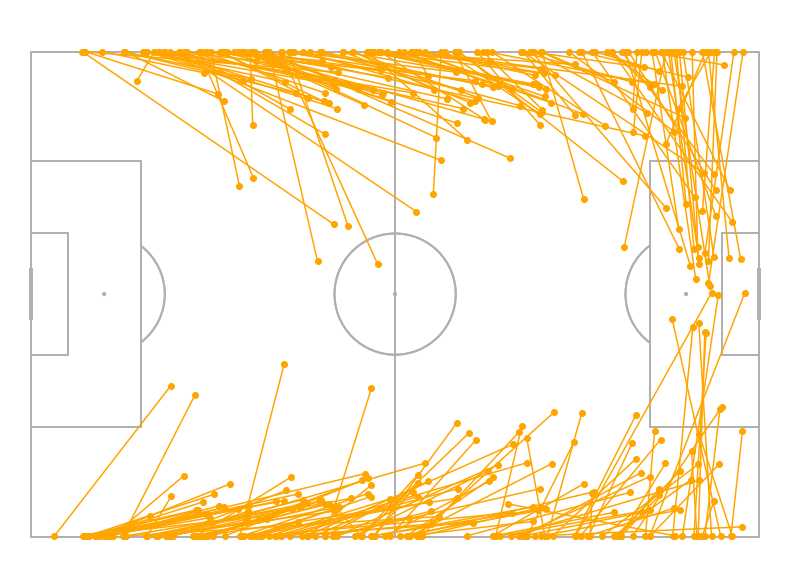

In [20]:
# graphing unsuccessful first contact throw ins

## set up pitch
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12,8))

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
p.draw(ax=ax)
plt.gca().invert_yaxis() 

# for loc in no_firstContact:
#     p.scatter(loc[0][0], loc[0][1], c='orange', s=80, ec='k', ax=ax)

for loc in no_firstContact:
    p.plot((loc[0][0], loc[1][0]), (loc[0][1], loc[1][1]), color='orange', ax=ax)
    p.scatter((loc[0][0], loc[1][0]), (loc[0][1], loc[1][1]), color='orange', ax=ax)
    
# for start_loc, end_loc in zip(start_location_list, end_location_list):
#     p.plot((start_loc[0], end_loc[0]), (start_loc[1], end_loc[1]), color='orange', ax=ax)
#     p.scatter((start_loc[0], end_loc[0]), (start_loc[1], end_loc[1]), color='orange', ax=ax)


plt.title('First Contact Unsuccessful Throw-ins (All Matches)',color='white',size=20)

In [18]:
df_heatmap = df_allData.loc[df_allData['pass_type'] == 'Throw-in']

for row in df_heatmap.index:
    df_heatmap['location'][row]=json.loads((df_heatmap["location"][row]))
    
# save event locations to a series with 2 columns
location_xy = df_heatmap.location.apply(pd.Series)
# # rename columns to x and y
location_xy.columns = ['x','y']

# # drop NaN
location_xy.dropna(inplace=True)
location_xy.head(5)

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_75719/457252712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['location'][row]=json.loads((df_heatmap["location"][row]))


,x,y
12,43.1,0.1
34,91.1,0.1
38,83.0,0.1
62,64.3,80.0
71,30.0,0.1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'First Contact Throw-ins')

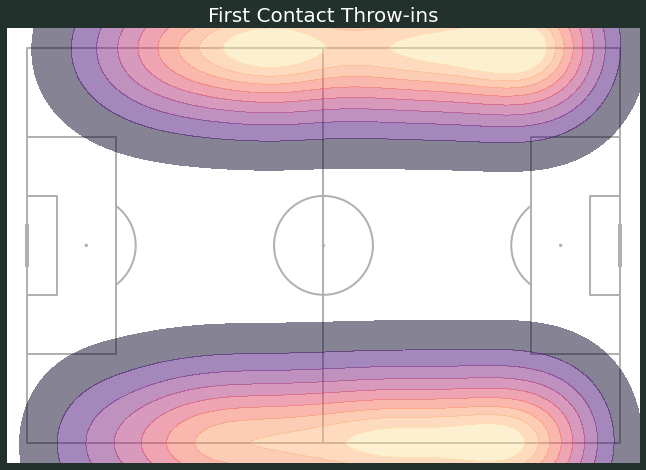

In [19]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(
        location_xy['x'],
        location_xy['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)

plt.title('First Contact Throw-ins',color='white',size=20)

From the graphs, we are able to see that successful throw-ins tend to be towards the middle of the field. Now, we move on to do linear regression on this data! 